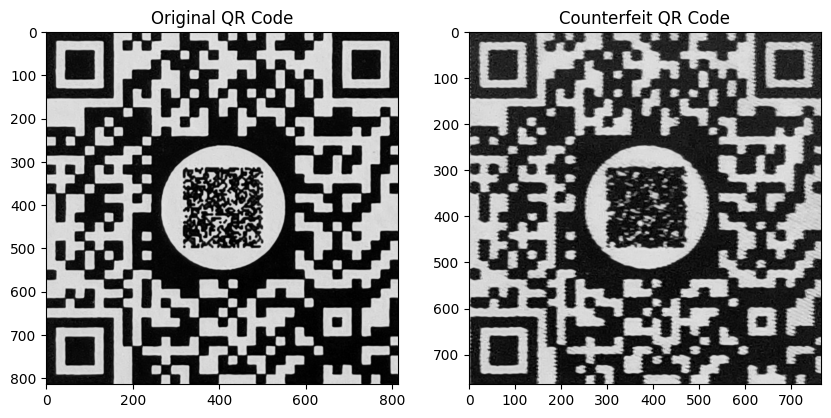

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset paths
original_path = r"E:\task\task-jupiter\First Print"
counterfeit_path = r"E:\task\task-jupiter\Second Print"

# Ensure directories exist
if not os.path.exists(original_path) or not os.path.exists(counterfeit_path):
    raise ValueError("One or both directories do not exist. Check the paths.")

# List files
original_files = os.listdir(original_path)
counterfeit_files = os.listdir(counterfeit_path)

# Load an example image
original_img = cv2.imread(os.path.join(original_path, original_files[0]), cv2.IMREAD_GRAYSCALE)
counterfeit_img = cv2.imread(os.path.join(counterfeit_path, counterfeit_files[0]), cv2.IMREAD_GRAYSCALE)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original QR Code")
plt.subplot(1, 2, 2)
plt.imshow(counterfeit_img, cmap='gray')
plt.title("Counterfeit QR Code")
plt.show()


In [2]:
import numpy as np

# Function to extract features from images
def extract_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))  # Resize for consistency
    return img.flatten()  # Convert image into a 1D feature vector

# Prepare dataset
features = []
labels = []

# Process first print images
for file in original_files:
    img_path = os.path.join(original_path, file)
    features.append(extract_features(img_path))
    labels.append(0)  # Label: First Print (Original)

# Process second print images
for file in counterfeit_files:
    img_path = os.path.join(counterfeit_path, file)
    features.append(extract_features(img_path))
    labels.append(1)  # Label: Second Print (Counterfeit)

# Convert lists to NumPy arrays
features = np.array(features)
labels = np.array(labels)


In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))


SVM Accuracy: 1.0


In [5]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/7f/03/8bf7bfb538fad40571b781a2aaa1ae905f617acef79d0aa8da7cc92390fb/tensorflow-2.19.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/2f/7a/874c46ad2d14998bc2eedac1133c5299e12fe728d2ce91b4d64f2fcc5089/absl_py-2.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751c


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ------------------------ --------------- 225.6/375.7 MB 1.7 MB/s eta 0:01:28
   ------------------------ --------------- 225.7/375.7 MB 1.7 MB/s eta 0:01:28
   ------------------------ --------------- 225.8/375.7 MB 1.7 MB/s eta 0:01:27
   ------------------------ --------------- 225.9/375.7 MB 1.7 MB/s eta 0:01:27
   ------------------------ --------------- 226.0/375.7 MB 1.7 MB/s eta 0:01:26
   ------------------------ --------------- 226.1/375.7 MB 1.8 MB/s eta 0:01:26
   ------------------------ --------------- 226.2/375.7 MB 1.8 MB/s eta 0:01:26
   ------------------------ --------------- 226.3/375.7 MB 1.8 MB/s eta 0:01:25
   ------------------------ --------------- 226.4/375.7 MB 1.8 MB/s eta 0:01:25
   ------------------------ --------------- 226.5/375.7 MB 1.8 MB/s eta 0:01:25
   ------------------------ --------------- 226.5/375.7 MB 1.8 MB/s eta 0:01:25
   ------------------------ --------------- 226.6/375.7 MB 1.8 MB/s eta 0:01:25
   ------------------------ ------------

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape features for CNN
X_train_cnn = X_train.reshape(-1, 128, 128, 1) / 255.0  # Normalize
X_test_cnn = X_test.reshape(-1, 128, 128, 1) / 255.0

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))


C:\Users\chandru kt\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.5186 - loss: 1.2552 - val_accuracy: 0.4750 - val_loss: 0.6716
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.5021 - loss: 0.7032 - val_accuracy: 0.4750 - val_loss: 0.6747
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.6531 - loss: 0.6476 - val_accuracy: 0.7750 - val_loss: 0.6330
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.8965 - loss: 0.6043 - val_accuracy: 0.7000 - val_loss: 0.5510
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.8357 - loss: 0.4859 - val_accuracy: 0.9000 - val_loss: 0.4055
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.9291 - loss: 0.3425 - val_accuracy: 0.9750 - val_loss: 0.2766
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step - accuracy: 0.9643 - loss: 0.2402 - val_accuracy: 0.9250 - val_loss: 0.2353
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - accuracy: 0.9274 - loss: 0.2120 - val_accuracy: 0.9250 - val_loss:

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Print evaluation metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
 [[21  0]
 [ 0 19]]
